Step 1 - Importing Required libraries

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras

Step 2 - Understanding data

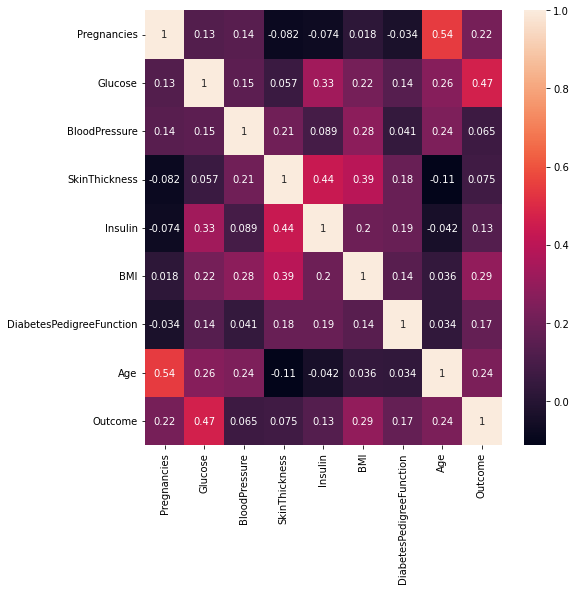

In [3]:
classification_data = pd.read_csv('diabetes.csv')

#correlation marix
correlation_matrix = classification_data.corr() 
plt.figure(figsize=(8, 8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

The features with highest correaltion with outcome are -
Glucose - .47
BMI - .29
Age - .24
Pregnancies - .22
DiabetesPedigreeFunction - .17
Insulin - .13

Step 3 - Normalizing the data and selecting most relevant features

In [4]:
features = np.asmatrix(classification_data[['Age', 'Insulin', 'DiabetesPedigreeFunction', 'Pregnancies', 'Glucose', 'BMI']])
Target = np.asmatrix(classification_data['Outcome']).T

#normalizing the dataset
features = (features - features.mean(axis=0)) / features.std(axis=0)

train_x, rem_x, train_y, rem_y = train_test_split(features,Target, test_size=0.4,random_state=1)
test_x, val_x, test_y, val_y = train_test_split(rem_x, rem_y, test_size=0.5,random_state=1)

Step 4 - Training Model

Step 4a - Helper functions

In [8]:
transform = lambda arr: np.dot(arr, weights) + b

def sigmoid(X):
    X = np.around(X, decimals=8)
    z = transform(X)
    denominator = np.exp(-z)
    return 1 / (1 + denominator)


def predict(X):
    probabilities = sigmoid(X)
    predicted = np.array([1 if element > 0.5 else 0 for element in probabilities])
    return predicted

def check_accuracy(X):
    count = 0
    for i in range(len(X)):
        if X[i] == predicted_y[i]:
            count+=1

    return "{:.2f} %".format(count/len(X) * 100)

Step 4b - training the model

In [9]:
passInfo = [[.05, 500], [.005, 1000], [.001, 1000], [5e-4, 1000], [5e-6, 2000], [5e-8, 4000], [1e-10, 7000], [1e-12, 10000]]
total_samples = train_x.shape[0]

#initial values of weights and bias
weights = np.random.randn(train_x.shape[1], 1)*.01
b =-6

#using differrent itration values for different learning rates
for info in passInfo:
    alpha = info[0]
    iterations = info[1]
    for i in range(iterations):
        p = sigmoid(train_x)
        
        #caluculating the gradient
        dz = p-train_y
        dw = (1 / total_samples) * np.dot(train_x.T, dz)
        db = (1 / total_samples) * np.sum(dz)
        
        #updating the parametes
        weights -= (alpha * dw)
        b -= (alpha * db)

Step 5 - tuning hyperparameters 

In [10]:
predicted_y = predict(train_x)
train_acc = check_accuracy(train_y)

predicted_y = predict(val_x)
val_acc = check_accuracy(val_y)

print("accuracy on training data", train_acc)
print("accuracy on validation data", val_acc)

accuracy on training data 78.48 %
accuracy on validation data 72.08 %


Step 6 - Verifying accuracy (79.87 %)

In [11]:
predicted_y = predict(test_x)
test_acc = check_accuracy(test_y)
print("accuracy on test data", test_acc)

accuracy on test data 79.87 %


Part - 2 (Neural Network)

Step 1 - reading data (again so as to use all features) and preprocessing

In [30]:
features = classification_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Target = classification_data['Outcome']

features = (features - features.mean(axis=0)) / features.std(axis=0)

train_x, rem_x, train_y, rem_y = train_test_split(features,Target, test_size=0.4,random_state=1)
test_x, val_x, test_y, val_y = train_test_split(rem_x, rem_y, test_size=0.5,random_state=1)

Step 2 - Training model with l2 regularization

In [31]:
hidden_units=50
learning_rate=.005
bsize = 10
hidden_layer_act='relu'
output_layer_act='sigmoid'
no_epochs=70
regularizer_l2 = keras.regularizers.l2()
lambda_val = .5

model_l2 = Sequential()
model_l2.add(Dense(8, input_dim=8, activation=hidden_layer_act, kernel_regularizer=regularizer_l2))
model_l2.add(Dense(4, activation=hidden_layer_act, kernel_regularizer=regularizer_l2))
model_l2.add(Dense(1, activation=output_layer_act, kernel_regularizer=regularizer_l2))
model_l2.compile(loss='binary_crossentropy',optimizer="rmsprop", metrics=['accuracy'])
history_l2 = model_l2.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=no_epochs)

Epoch 1/70
15/15 [==============================] - 1s 15ms/step - loss: 0.9161 - accuracy: 0.3283 - val_loss: 0.9266 - val_accuracy: 0.3182
Epoch 2/70
15/15 [==============================] - 0s 4ms/step - loss: 0.8802 - accuracy: 0.3522 - val_loss: 0.8992 - val_accuracy: 0.3506
Epoch 3/70
15/15 [==============================] - 0s 4ms/step - loss: 0.8573 - accuracy: 0.4174 - val_loss: 0.8778 - val_accuracy: 0.4805
Epoch 4/70
15/15 [==============================] - 0s 5ms/step - loss: 0.8392 - accuracy: 0.5478 - val_loss: 0.8603 - val_accuracy: 0.5455
Epoch 5/70
15/15 [==============================] - 0s 4ms/step - loss: 0.8243 - accuracy: 0.6609 - val_loss: 0.8451 - val_accuracy: 0.5779
Epoch 6/70
15/15 [==============================] - 0s 3ms/step - loss: 0.8115 - accuracy: 0.6913 - val_loss: 0.8312 - val_accuracy: 0.5909
Epoch 7/70
15/15 [==============================] - 0s 4ms/step - loss: 0.7997 - accuracy: 0.6957 - val_loss: 0.8201 - val_accuracy: 0.6039
Epoch 8/70
15/15 [=

Step 3 - Visulization

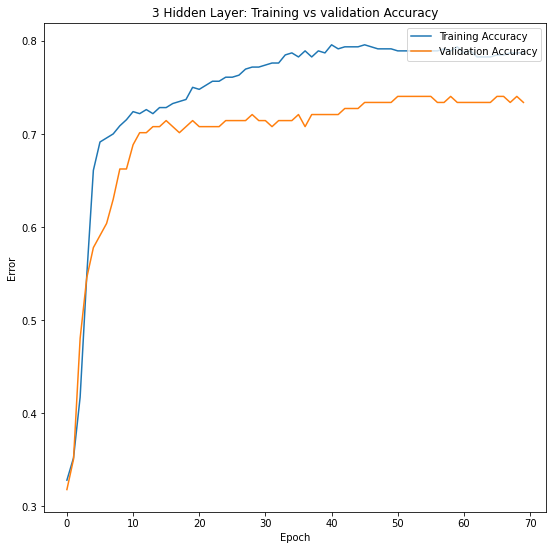

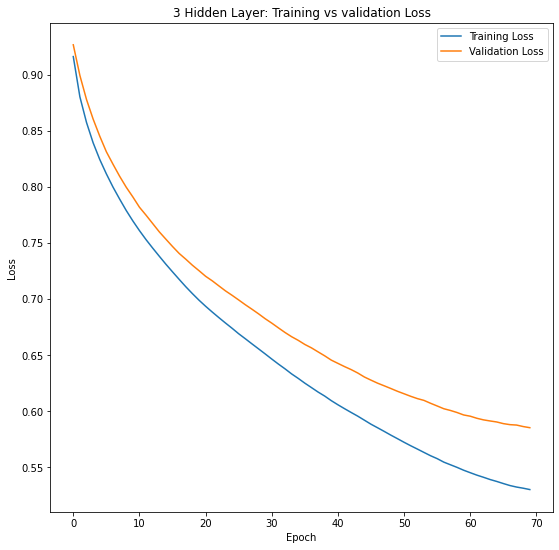

In [39]:
# Accuracy
plt.figure(figsize=(9, 9))
plt.plot(history_l2.history['accuracy'])
plt.plot(history_l2.history['val_accuracy'])
plt.title('3 Hidden Layer: Training vs validation Accuracy')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(9, 9))
plt.plot(history_l2.history['loss'])
plt.plot(history_l2.history['val_loss'])
plt.title('3 Hidden Layer: Training vs validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

Step 4 - Result

In [40]:
prediction = model_l2.predict(test_x)
accuracy_l2 = accuracy_score(test_y, prediction.round())
print(f"Accuracy of test set is :", "{:.2f} %".format(accuracy_l2 * 100))

Accuracy of test set is : 77.92 %


Part 3 - Comparing regularization methods (l1, l2, dropout)

Step 1 - Training remaining models

In [36]:
regularizer_l1 = keras.regularizers.l1()
lambda_val = .5

model_l1 = Sequential()
model_l1.add(Dense(8, input_dim=8, activation=hidden_layer_act, kernel_regularizer=regularizer_l1))
model_l1.add(Dense(4, activation=hidden_layer_act, kernel_regularizer=regularizer_l1))
model_l1.add(Dense(1, activation=output_layer_act, kernel_regularizer=regularizer_l1))
model_l1.compile(loss='binary_crossentropy',optimizer="rmsprop", metrics=['accuracy'])
history_l1 = model_l1.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=no_epochs)

model_dropout = Sequential()
model_dropout.add(Dense(8, input_dim=8, activation=hidden_layer_act))
model_dropout.add(Dense(4, activation=hidden_layer_act))
model_dropout.add(keras.layers.Dropout(0.3))
model_dropout.add(Dense(1, activation=output_layer_act))
model_dropout.compile(loss='binary_crossentropy',optimizer="rmsprop", metrics=['accuracy'])
history_dropout = model_dropout.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=no_epochs)

Epoch 1/70
15/15 [==============================] - 1s 15ms/step - loss: 1.0826 - accuracy: 0.3435 - val_loss: 1.0815 - val_accuracy: 0.3377
Epoch 2/70
15/15 [==============================] - 0s 4ms/step - loss: 1.0455 - accuracy: 0.3696 - val_loss: 1.0506 - val_accuracy: 0.3831
Epoch 3/70
15/15 [==============================] - 0s 4ms/step - loss: 1.0212 - accuracy: 0.3978 - val_loss: 1.0262 - val_accuracy: 0.3766
Epoch 4/70
15/15 [==============================] - 0s 4ms/step - loss: 1.0008 - accuracy: 0.4435 - val_loss: 1.0061 - val_accuracy: 0.4481
Epoch 5/70
15/15 [==============================] - 0s 5ms/step - loss: 0.9837 - accuracy: 0.5152 - val_loss: 0.9872 - val_accuracy: 0.5000
Epoch 6/70
15/15 [==============================] - 0s 4ms/step - loss: 0.9668 - accuracy: 0.6304 - val_loss: 0.9698 - val_accuracy: 0.6364
Epoch 7/70
15/15 [==============================] - 0s 4ms/step - loss: 0.9515 - accuracy: 0.7174 - val_loss: 0.9544 - val_accuracy: 0.6688
Epoch 8/70
15/15 [=

Step 2 - Visualization

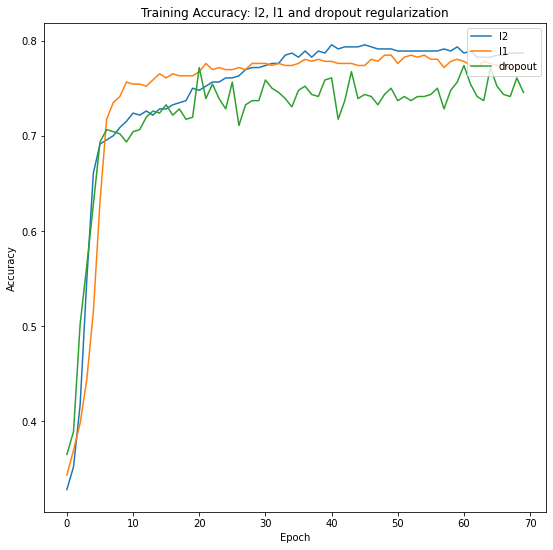

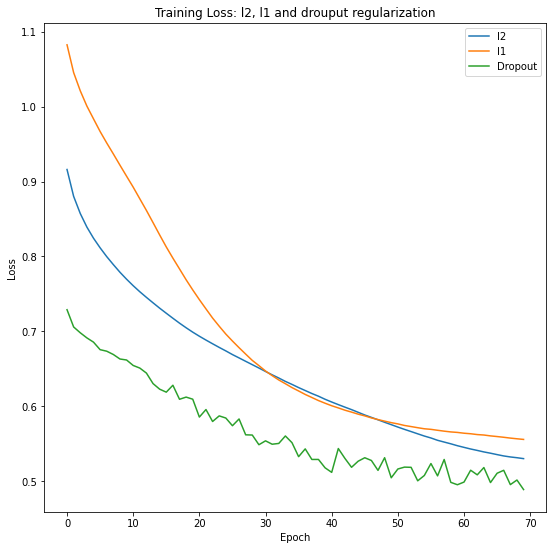

In [38]:
# Accuracy
plt.figure(figsize=(9, 9))
plt.plot(history_l2.history['accuracy'])
plt.plot(history_l1.history['accuracy'])
plt.plot(history_dropout.history['accuracy'])
plt.title('Training Accuracy: l2, l1 and dropout regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['l2', 'l1', 'dropout'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(9, 9))
plt.plot(history_l2.history['loss'])
plt.plot(history_l1.history['loss'])
plt.plot(history_dropout.history['loss'])
plt.title('Training Loss: l2, l1 and drouput regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['l2', 'l1', 'Dropout'], loc='upper right')
plt.show()